In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [70]:
from tl_hidden.tl_model import load_module
from tl_hidden.tl_inference import extract_hidden_features_from_disk
from tl_hidden.tl_reco import get_classifier
from tl_hidden.tl_reco import get_reco
from tl_hidden.utils import list_all_images
from tl_hidden.utils import visualize_reco

import numpy as np
import pickle

In [3]:
input_tensor, output_tensor, image_shape = load_module()

INFO:tensorflow:Using /tmp/tfhub_modules to cache modules.
INFO:tensorflow:Initialize variable module/InceptionV3/Conv2d_1a_3x3/BatchNorm/beta:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Conv2d_1a_3x3/BatchNorm/beta
INFO:tensorflow:Initialize variable module/InceptionV3/Conv2d_1a_3x3/BatchNorm/moving_mean:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Conv2d_1a_3x3/BatchNorm/moving_mean
INFO:tensorflow:Initialize variable module/InceptionV3/Conv2d_1a_3x3/BatchNorm/moving_variance:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Conv2d_1a_3x3/BatchNorm/moving_variance
INFO:tensorflow:Initialize variable module/InceptionV3/Conv2d_1a_3x3/weights:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Conv2d_1a_3x3/wei

INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_5b/Branch_2/Conv2d_0a_1x1/BatchNorm/moving_mean:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_5b/Branch_2/Conv2d_0a_1x1/BatchNorm/moving_mean
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_5b/Branch_2/Conv2d_0a_1x1/BatchNorm/moving_variance:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_5b/Branch_2/Conv2d_0a_1x1/BatchNorm/moving_variance
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_5b/Branch_2/Conv2d_0a_1x1/weights:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_5b/Branch_2/Conv2d_0a_1x1/weights
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_5b/Branch_2/Conv2d_0b_3x3/BatchNorm/beta:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff4215

INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_5c/Branch_2/Conv2d_0a_1x1/weights:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_5c/Branch_2/Conv2d_0a_1x1/weights
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_5c/Branch_2/Conv2d_0b_3x3/BatchNorm/beta:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_5c/Branch_2/Conv2d_0b_3x3/BatchNorm/beta
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_5c/Branch_2/Conv2d_0b_3x3/BatchNorm/moving_mean:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_5c/Branch_2/Conv2d_0b_3x3/BatchNorm/moving_mean
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_5c/Branch_2/Conv2d_0b_3x3/BatchNorm/moving_variance:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variab

INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_5d/Branch_2/Conv2d_0b_3x3/BatchNorm/moving_variance:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_5d/Branch_2/Conv2d_0b_3x3/BatchNorm/moving_variance
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_5d/Branch_2/Conv2d_0b_3x3/weights:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_5d/Branch_2/Conv2d_0b_3x3/weights
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_5d/Branch_2/Conv2d_0c_3x3/BatchNorm/beta:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_5d/Branch_2/Conv2d_0c_3x3/BatchNorm/beta
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_5d/Branch_2/Conv2d_0c_3x3/BatchNorm/moving_mean:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/va

INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_6b/Branch_1/Conv2d_0a_1x1/BatchNorm/moving_mean:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_6b/Branch_1/Conv2d_0a_1x1/BatchNorm/moving_mean
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_6b/Branch_1/Conv2d_0a_1x1/BatchNorm/moving_variance:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_6b/Branch_1/Conv2d_0a_1x1/BatchNorm/moving_variance
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_6b/Branch_1/Conv2d_0a_1x1/weights:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_6b/Branch_1/Conv2d_0a_1x1/weights
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_6b/Branch_1/Conv2d_0b_1x7/BatchNorm/beta:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff4215

INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_6b/Branch_2/Conv2d_0e_1x7/weights:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_6b/Branch_2/Conv2d_0e_1x7/weights
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_6b/Branch_3/Conv2d_0b_1x1/BatchNorm/beta:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_6b/Branch_3/Conv2d_0b_1x1/BatchNorm/beta
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_6b/Branch_3/Conv2d_0b_1x1/BatchNorm/moving_mean:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_6b/Branch_3/Conv2d_0b_1x1/BatchNorm/moving_mean
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_6b/Branch_3/Conv2d_0b_1x1/BatchNorm/moving_variance:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variab

INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_6c/Branch_2/Conv2d_0c_1x7/BatchNorm/moving_variance:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_6c/Branch_2/Conv2d_0c_1x7/BatchNorm/moving_variance
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_6c/Branch_2/Conv2d_0c_1x7/weights:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_6c/Branch_2/Conv2d_0c_1x7/weights
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_6c/Branch_2/Conv2d_0d_7x1/BatchNorm/beta:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_6c/Branch_2/Conv2d_0d_7x1/BatchNorm/beta
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_6c/Branch_2/Conv2d_0d_7x1/BatchNorm/moving_mean:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/va

INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_6d/Branch_2/Conv2d_0a_1x1/BatchNorm/moving_mean:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_6d/Branch_2/Conv2d_0a_1x1/BatchNorm/moving_mean
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_6d/Branch_2/Conv2d_0a_1x1/BatchNorm/moving_variance:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_6d/Branch_2/Conv2d_0a_1x1/BatchNorm/moving_variance
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_6d/Branch_2/Conv2d_0a_1x1/weights:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_6d/Branch_2/Conv2d_0a_1x1/weights
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_6d/Branch_2/Conv2d_0b_7x1/BatchNorm/beta:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff4215

INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_6e/Branch_1/Conv2d_0a_1x1/weights:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_6e/Branch_1/Conv2d_0a_1x1/weights
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_6e/Branch_1/Conv2d_0b_1x7/BatchNorm/beta:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_6e/Branch_1/Conv2d_0b_1x7/BatchNorm/beta
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_6e/Branch_1/Conv2d_0b_1x7/BatchNorm/moving_mean:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_6e/Branch_1/Conv2d_0b_1x7/BatchNorm/moving_mean
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_6e/Branch_1/Conv2d_0b_1x7/BatchNorm/moving_variance:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variab

INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_6e/Branch_3/Conv2d_0b_1x1/BatchNorm/moving_variance:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_6e/Branch_3/Conv2d_0b_1x1/BatchNorm/moving_variance
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_6e/Branch_3/Conv2d_0b_1x1/weights:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_6e/Branch_3/Conv2d_0b_1x1/weights
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_7a/Branch_0/Conv2d_0a_1x1/BatchNorm/beta:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_7a/Branch_0/Conv2d_0a_1x1/BatchNorm/beta
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_7a/Branch_0/Conv2d_0a_1x1/BatchNorm/moving_mean:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/va

INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_7b/Branch_1/Conv2d_0a_1x1/BatchNorm/moving_mean:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_7b/Branch_1/Conv2d_0a_1x1/BatchNorm/moving_mean
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_7b/Branch_1/Conv2d_0a_1x1/BatchNorm/moving_variance:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_7b/Branch_1/Conv2d_0a_1x1/BatchNorm/moving_variance
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_7b/Branch_1/Conv2d_0a_1x1/weights:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_7b/Branch_1/Conv2d_0a_1x1/weights
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_7b/Branch_1/Conv2d_0b_1x3/BatchNorm/beta:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff4215

INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_7b/Branch_3/Conv2d_0b_1x1/weights:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_7b/Branch_3/Conv2d_0b_1x1/weights
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_7c/Branch_0/Conv2d_0a_1x1/BatchNorm/beta:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_7c/Branch_0/Conv2d_0a_1x1/BatchNorm/beta
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_7c/Branch_0/Conv2d_0a_1x1/BatchNorm/moving_mean:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_7c/Branch_0/Conv2d_0a_1x1/BatchNorm/moving_mean
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_7c/Branch_0/Conv2d_0a_1x1/BatchNorm/moving_variance:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variab

INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_7c/Branch_2/Conv2d_0d_3x1/BatchNorm/moving_variance:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_7c/Branch_2/Conv2d_0d_3x1/BatchNorm/moving_variance
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_7c/Branch_2/Conv2d_0d_3x1/weights:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_7c/Branch_2/Conv2d_0d_3x1/weights
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_7c/Branch_3/Conv2d_0b_1x1/BatchNorm/beta:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/variables/variables' with InceptionV3/Mixed_7c/Branch_3/Conv2d_0b_1x1/BatchNorm/beta
INFO:tensorflow:Initialize variable module/InceptionV3/Mixed_7c/Branch_3/Conv2d_0b_1x1/BatchNorm/moving_mean:0 from checkpoint b'/tmp/tfhub_modules/11d9faf945d073033780fd924b2b09ff42155763/va

In [3]:
PATH = '/home/ubuntu/Projects/FashionRecommender/data/baseline/images/'

In [5]:
list_images = list_all_images(PATH)

In [6]:
hidden_features, image_names = extract_hidden_features_from_disk(input_tensor,
                                                                 output_tensor,
                                                                 image_shape,
                                                                 list_images,
                                                                 path = PATH,
                                                                 batch_img_size = 1024,
                                                                 batch_tf_size = 256,
                                                                 padding = True
                                                                )

Batch images:0
(1024, 299, 299, 3)
Batch tensorflow:0
Batch tensorflow:1
Batch tensorflow:2
Batch tensorflow:3
Batch tensorflow:4
Batch images:1
(1024, 299, 299, 3)
Batch tensorflow:0
Batch tensorflow:1
Batch tensorflow:2
Batch tensorflow:3
Batch tensorflow:4
Batch images:2
(1024, 299, 299, 3)
Batch tensorflow:0
Batch tensorflow:1
Batch tensorflow:2
Batch tensorflow:3
Batch tensorflow:4
Batch images:3
(1024, 299, 299, 3)
Batch tensorflow:0
Batch tensorflow:1
Batch tensorflow:2
Batch tensorflow:3
Batch tensorflow:4
Batch images:4
(1024, 299, 299, 3)
Batch tensorflow:0
Batch tensorflow:1
Batch tensorflow:2
Batch tensorflow:3
Batch tensorflow:4
Batch images:5
(1024, 299, 299, 3)
Batch tensorflow:0
Batch tensorflow:1
Batch tensorflow:2
Batch tensorflow:3
Batch tensorflow:4
Batch images:6
(1024, 299, 299, 3)
Batch tensorflow:0
Batch tensorflow:1
Batch tensorflow:2
Batch tensorflow:3
Batch tensorflow:4
Batch images:7
(1024, 299, 299, 3)
Batch tensorflow:0
Batch tensorflow:1
Batch tensorflow:

In [7]:
print(hidden_features.shape, len(image_names))

(61862, 2048) 61862


# Save hidden features

In [8]:
with open('hidden_features.pickle', 'wb') as handle:
    pickle.dump(hidden_features, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('image_names.pickle', 'wb') as handle:
    pickle.dump(image_names, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Load hidden features

In [4]:
with open('hidden_features.pickle', 'rb') as handle:
    hidden_features = pickle.load(handle)
with open('image_names.pickle', 'rb') as handle:
    image_names = pickle.load(handle)

# Example find similar images

In [76]:
NO_EXAMPLE = 10

In [77]:
kNN = get_classifier(hidden_features)

In [78]:
index_itemset = np.random.choice(hidden_features.shape[0], NO_EXAMPLE)
reco = get_reco(kNN, hidden_features[index_itemset])

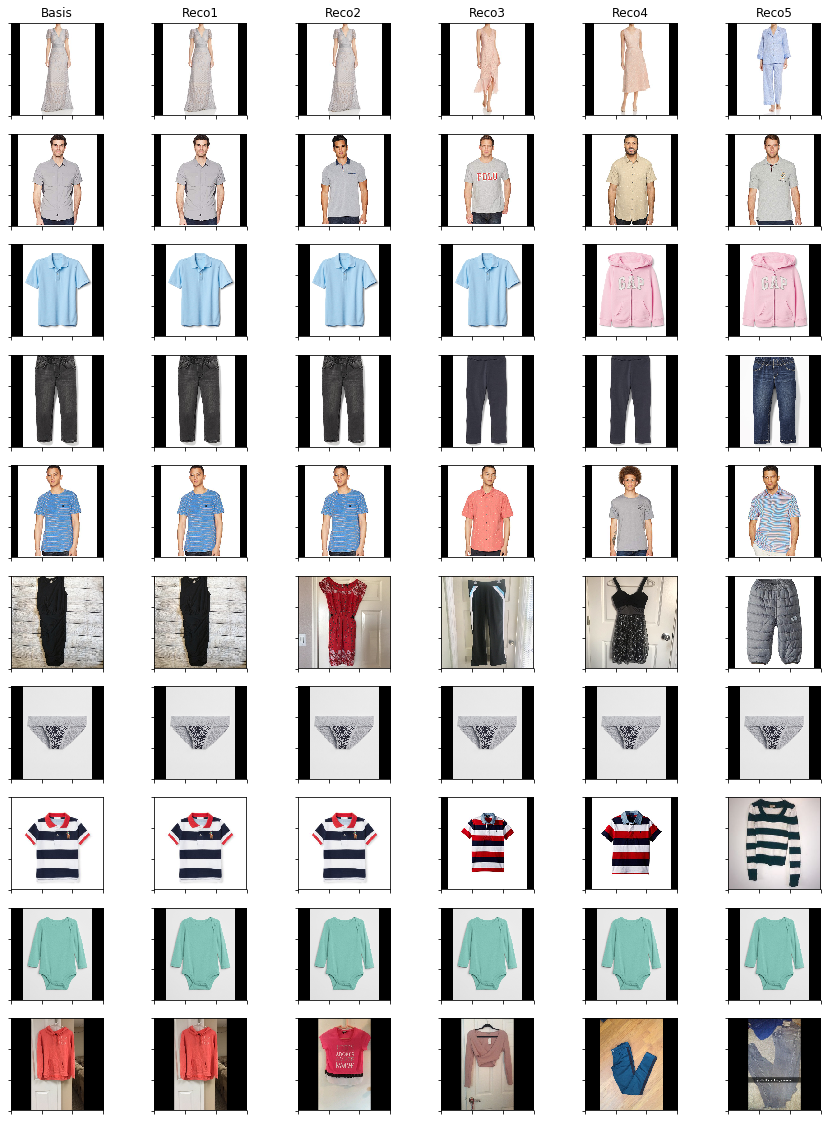

In [79]:
visualize_reco(reco, index_itemset, image_names, path = PATH)